In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
input_data = "results/cd_a_christmas_carol_by_charles_dickens_pred.csv"
output_data = "results/t2e_christmas_carol_by_charles_dickens.csv"

In [3]:
df = pd.read_csv(input_data)

In [4]:
df.drop(['surprise'], axis=1)

,Unnamed: 0,text,joy,anger,sadness,fear
0,0,ï»¿ STAVE ONE MARLEY'S GHOST,0.00,0.00,0.00,0.00
1,1,"Marley was dead, to begin with.",0.00,0.00,0.00,0.00
2,2,There is no doubt whatever about that.,0.00,0.00,0.00,1.00
3,3,The register of his burial was signed by the c...,0.00,0.00,0.00,1.00
4,4,And Scrooge's name was good upon 'Change for a...,0.50,0.00,0.50,0.00
...,...,...,...,...,...,...
1444,1444,Some people laughed to see the alteration in h...,0.22,0.11,0.22,0.22
1445,1445,His own heart laughed: and that was quite enou...,0.00,0.00,1.00,0.00
1446,1446,"He had no further intercourse with Spirits, bu...",0.00,0.00,0.40,0.20
1447,1447,"May that be truly said of us, and all of us!",0.00,0.00,0.00,0.50


In [5]:
df["total"] = df["joy"] + df["anger"] + df["sadness"] + df["fear"]

In [6]:
df = df[df['total'] > 0]

In [7]:
df['emotions'] = df[['joy','anger','sadness','fear']].idxmax(axis=1)

In [8]:
df['count'] = df["emotions"].groupby(df["emotions"]).transform('count')

In [9]:
df.head()

,Unnamed: 0,text,joy,anger,surprise,sadness,fear,total,emotions,count
2,2,There is no doubt whatever about that.,0.0,0.0,0.0,0.0,1.0,1.0,fear,390
3,3,The register of his burial was signed by the c...,0.0,0.0,0.0,0.0,1.0,1.0,fear,390
4,4,And Scrooge's name was good upon 'Change for a...,0.5,0.0,0.0,0.5,0.0,1.0,joy,220
6,6,"I don't mean to say that I know, of my own kno...",0.0,0.0,0.5,0.5,0.0,0.5,sadness,397
7,7,"I might have been inclined, myself, to regard ...",0.5,0.5,0.0,0.0,0.0,1.0,joy,220


In [10]:
emotion_name = df['emotions'].unique()
emotion_count = df['count'].unique()

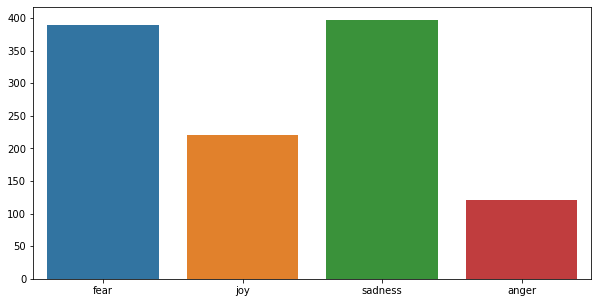

In [11]:
plt.figure(figsize=(10,5))
g = sns.barplot(x=emotion_name, y=emotion_count)

In [12]:
result_df = df[["text","emotions"]]

In [13]:
result_df.head()

,text,emotions
2,There is no doubt whatever about that.,fear
3,The register of his burial was signed by the c...,fear
4,And Scrooge's name was good upon 'Change for a...,joy
6,"I don't mean to say that I know, of my own kno...",sadness
7,"I might have been inclined, myself, to regard ...",joy


In [14]:
result_df.to_csv(output_data, index=False)